In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import numba
from make_features import single_autocorr, read_all, find_start_end
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import seaborn as sns
decompfreq = 288

/home/lihaocheng_i/miniconda2/envs/py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dfs = read_all('/nfs/isolation_project/intern/project/lihaocheng/vm/')
df = dfs[0].iloc[:, 0:-288]
df.sort_index()
start, end = find_start_end(df.values)
page_mask = (end - start) / df.shape[1] < 0.04
print("Masked %d vms from %d" % (page_mask.sum(), len(df)))
inv_mask = ~page_mask
df = dfs[0][inv_mask].values
start = start[inv_mask]
end = end[inv_mask]

Masked 630 vms from 4037


In [3]:
def std(idx):
    return np.sqrt(np.mean((df[idx, start[idx] : end[idx]] - np.mean(df[idx, start[idx] : end[idx]])) ** 2))
    
def depict_auto(st, max_lag):
    fig, axs = plt.subplots(8, 1, figsize=(10, 80))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i in range(st, st + 56):
        valid = df[i, start[i]:]
        cor = [single_autocorr(valid, i) for i in range(1, max_lag)]
        ax = axs[(i - st) // 7]
        ax.plot(np.arange(max_lag - 1), cor, colors[(i - st) % 7], label=str(i))
        ax.axhline(y=cor[0]*0.75, color=colors[(i - st) % 7], linestyle='--')
        ax.axhline(y=-cor[0]*0.75, color=colors[(i - st) % 7], linestyle='--')
        ax.legend(loc='upper right')
        if not (i - st) % 7:
            ax.set_title(f'autocor for vm from {i} to {i + 6}')
            ax.set_xlabel('lag')
            ax.set_ylabel('autocorrelation')
            for i in range(max_lag // 288 + 1):
                ax.axvline(x=288 * i, color='k', linestyle='--')
    plt.show()
    
def depict_pauto(st, max_lag):
    fig, axs = plt.subplots(8, 1, figsize=(10, 80))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    
def depict_cpu(vm, st = 0, end = df.shape[1]):
    if st == 0: st = start[vm]
    else: st += start[vm]
    if not end == df.shape[1]: end += start[vm]
    plt.plot(np.arange(end - st), df[vm, st:end])
    plt.title(f'cpu usage for {vm}')
    plt.xlabel('timestamps')
    plt.ylabel('cpu usage')
    plt.show()
    
def find_periodic(vms):
    for vm in vms:
        res = sm.tsa.seasonal_decompose(dataframe.iloc[vm, start[vm]+1000:].interpolate(),
                                        freq=decompfreq,
                                        model='additive')
        # resplot = res.plot()
        # resplot.show()
        print( (res.seasonal.max() - res.seasonal.min())/ (res.observed.max() - res.observed.min()))

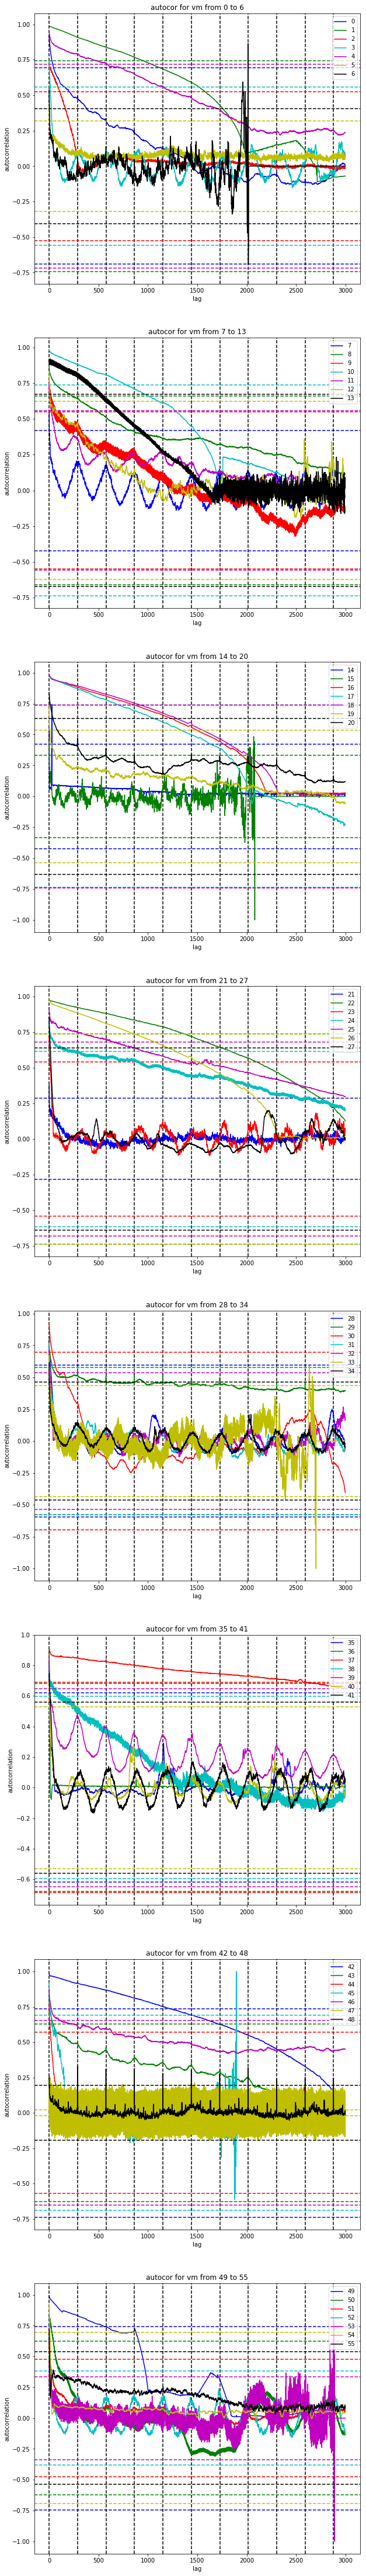

In [4]:
depict_auto(0, 3000)

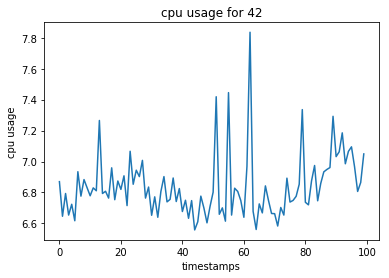

In [16]:
depict_cpu(42, 1200, 1300)

In [6]:
find_periodic([36])

0.03694637770460793
